In [2]:
#Implementation of Canny Edge Detector

#Import Libraries
import matplotlib.pyplot as plt
import numpy as np
import imageio
import cv2
from scipy import ndimage

In [3]:
#This cell contains all the used functions for Phase I 

#Define RGB2gray function
def rgb2gray(img) :
    return np.dot(img[..., :3], [0.2989, 0.5870, 0.1140])


#Detemine gradient function for Fx and Fy using sobel filter(normlized)
def gradient_x(img) :
    grad_img = ndimage.convolve(img, np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]]))
    return grad_img/np.max(grad_img)

def gradient_y(img) :
    grad_img = ndimage.convolve(img, np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]]))
    return grad_img/np.max(grad_img)


#Define gradient magnitude function
def gradient_mag(fx, fy) :
    grad_mag = np.hypot(fx, fy)
    return grad_mag/np.max(grad_mag)

In [4]:
#This cell contains all functions used in Phase 2

#2.a : Find closest direction D*
def closest_dir_function(grad_dir) :
    closest_dir_arr = np.zeros(grad_dir.shape)
    for i in range(1, int(grad_dir.shape[0] - 1)) :
        for j in range(1, int(grad_dir.shape[1] - 1)) :
            
            if((grad_dir[i, j] > -22.5 and grad_dir[i, j] <= 22.5) or (grad_dir[i, j] <= -157.5 and grad_dir[i, j] > 157.5)) :
                closest_dir_arr[i, j] = 0
                
            elif((grad_dir[i, j] > 22.5 and grad_dir[i, j] <= 67.5) or (grad_dir[i, j] <= -112.5 and grad_dir[i, j] > -157.5)) :
                closest_dir_arr[i, j] = 45
                
            elif((grad_dir[i, j] > 67.5 and grad_dir[i, j] <= 112.5) or (grad_dir[i, j] <= -67.5 and grad_dir[i, j] > -112.5)) : 
                closest_dir_arr[i, j] = 90
                
            else:
                closest_dir_arr[i, j] = 135
                
    return closest_dir_arr


#2.b : Convert to thinned edge
def non_maximal_suppressor(grad_mag, closest_dir) :
    thinned_output = np.zeros(grad_mag.shape)
    for i in range(1, int(grad_mag.shape[0] - 1)) :
        for j in range(1, int(grad_mag.shape[1] - 1)) :
            
            if(closest_dir[i, j] == 0) :
                if((grad_mag[i, j] > grad_mag[i, j+1]) and (grad_mag[i, j] > grad_mag[i, j-1])) :
                    thinned_output[i, j] = grad_mag[i, j]
                else :
                    thinned_output[i, j] = 0
            
            elif(closest_dir[i, j] == 45) :
                if((grad_mag[i, j] > grad_mag[i+1, j+1]) and (grad_mag[i, j] > grad_mag[i-1, j-1])) :
                    thinned_output[i, j] = grad_mag[i, j]
                else :
                    thinned_output[i, j] = 0
            
            elif(closest_dir[i, j] == 90) :
                if((grad_mag[i, j] > grad_mag[i+1, j]) and (grad_mag[i, j] > grad_mag[i-1, j])) :
                    thinned_output[i, j] = grad_mag[i, j]
                else :
                    thinned_output[i, j] = 0
            
            else :
                if((grad_mag[i, j] > grad_mag[i+1, j-1]) and (grad_mag[i, j] > grad_mag[i-1, j+1])) :
                    thinned_output[i, j] = grad_mag[i, j]
                else :
                    thinned_output[i, j] = 0
            
    return thinned_output/np.max(thinned_output)   

In [5]:
#This cell contains all the used functions for Phase III

#Function to include weak pixels that are connected to chain of strong pixels 
def DFS(img) :
    for i in range(1, int(img.shape[0] - 1)) :
        for j in range(1, int(img.shape[1] - 1)) :
            if(img[i, j] == 1) :
                t_max = max(img[i-1, j-1], img[i-1, j], img[i-1, j+1], img[i, j-1],
                            img[i, j+1], img[i+1, j-1], img[i+1, j], img[i+1, j+1])
                if(t_max == 2) :
                    img[i, j] = 2
                
                    
#Hysteresis Thresholding
def hysteresis_thresholding(img) :
    low_ratio = 0.10
    high_ratio = 0.30
    diff = np.max(img) - np.min(img)
    t_low = np.min(img) + low_ratio * diff
    t_high = np.min(img) + high_ratio * diff
    
    temp_img = np.copy(img)
    
    #Assign values to pixels
    for i in range(1, int(img.shape[0] - 1)) :
        for j in range(1, int(img.shape[1] - 1)) :
            #Strong pixels
            if(img[i, j] > t_high) :
                temp_img[i, j] = 2
            #Weak pixels
            elif(img[i, j] < t_low) :
                temp_img[i, j] = 0
            #Intermediate pixels
            else :
                temp_img[i, j] = 1
    
    #Include weak pixels that are connected to chain of strong pixels 
    total_strong = np.sum(temp_img == 2)
    while(1) :
        DFS(temp_img)
        if(total_strong == np.sum(temp_img == 2)) :
            break
        total_strong = np.sum(temp_img == 2)
    
    #Remove weak pixels
    for i in range(1, int(temp_img.shape[0] - 1)) :
        for j in range(1, int(temp_img.shape[1] - 1)) :
            if(temp_img[i, j] == 1) :
                temp_img[i, j] = 0
    
    temp_img = temp_img/np.max(temp_img)
    return temp_img    

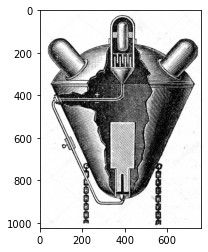

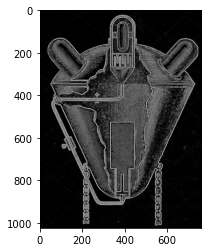

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


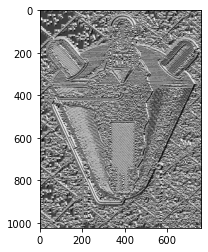

Lossy conversion from float64 to uint8. Range [-179.99999999999937, 180.0]. Convert image to uint8 prior to saving to suppress this warning.


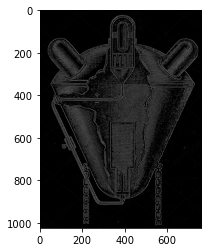

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


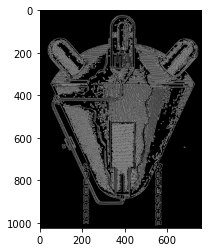

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


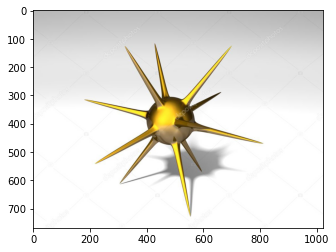

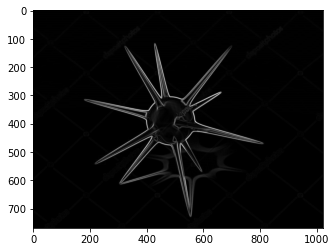

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


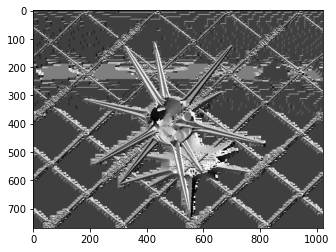

Lossy conversion from float64 to uint8. Range [-179.99999999999883, 180.0]. Convert image to uint8 prior to saving to suppress this warning.


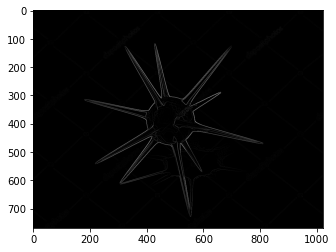

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


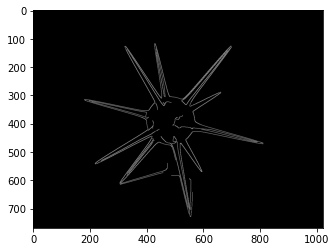

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


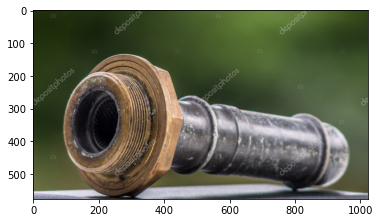

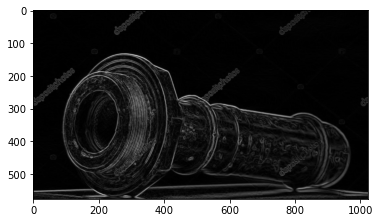

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


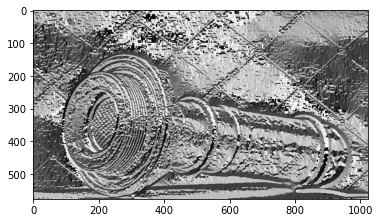

Lossy conversion from float64 to uint8. Range [-179.99999999999974, 180.0]. Convert image to uint8 prior to saving to suppress this warning.


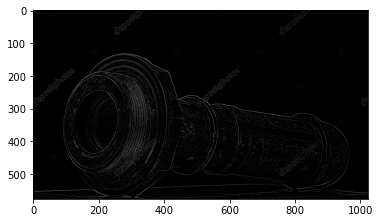

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


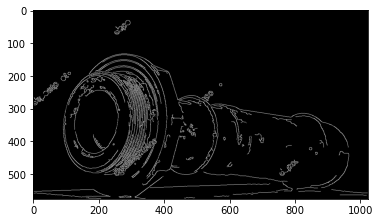

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


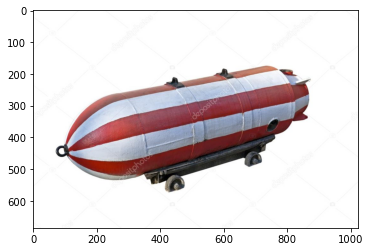

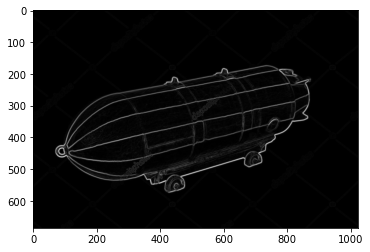

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


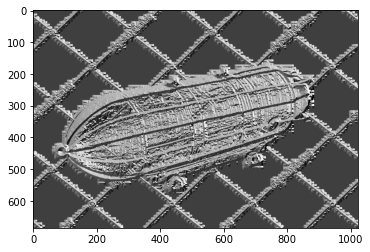

Lossy conversion from float64 to uint8. Range [-179.99999999985152, 180.0]. Convert image to uint8 prior to saving to suppress this warning.


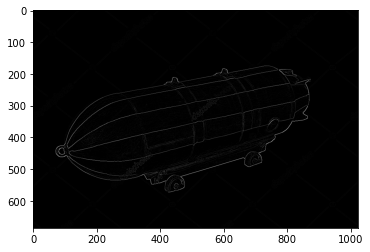

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


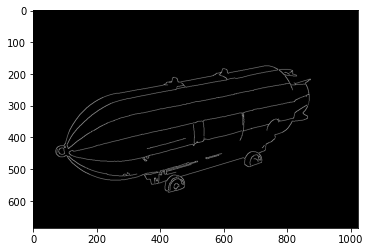

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


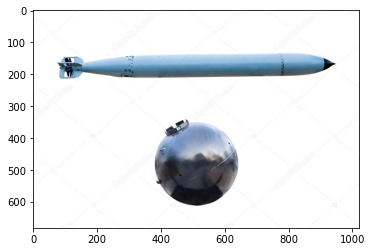

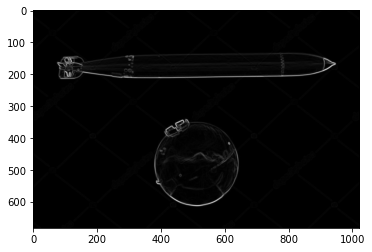

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


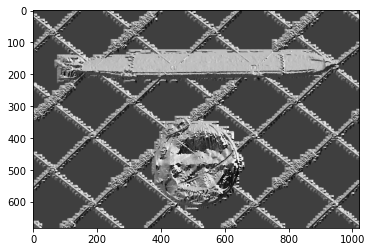

Lossy conversion from float64 to uint8. Range [-179.999999999996, 180.0]. Convert image to uint8 prior to saving to suppress this warning.


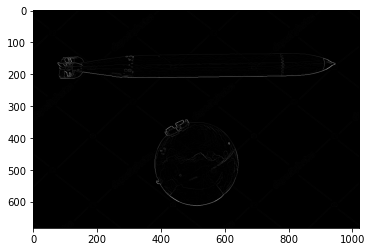

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


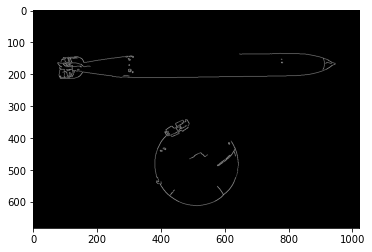

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


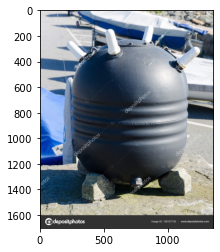

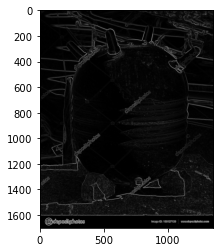

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


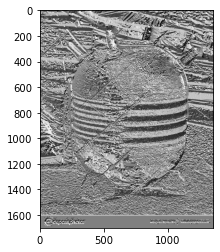

Lossy conversion from float64 to uint8. Range [-179.99999999999991, 180.0]. Convert image to uint8 prior to saving to suppress this warning.


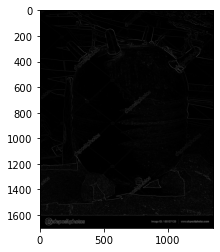

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


In [ ]:
#Canny Edge Detector Implementation and test

input_path = "C:\\Users\\iamsc\\data\\"
output_path = "C:\\Users\\iamsc\\canny_output\\"
img_name = ["mine1.jpg","mine2.jpg","mine3.jpg","mine4.jpg","mine5.jpg","mine6.jpg","mine7.jpg","mine8.jpg","mine9.jpg","mine10.jpg","mine11.jpg","mine12.jpg","mine13.jpg","mine14.jpg"]
# img_name = ["mine1.jpg"]

#Load the input images
for img in img_name :
    input_img = imageio.imread(input_path + img)
    plt.imshow(input_img)
    plt.show()
    
    #Convert the image to grayscale
    gray_input_img = rgb2gray(input_img)
    
    #Apply gaussian blurring
    blur_img = ndimage.gaussian_filter(gray_input_img, sigma = 1.0)
    
    #Find gradient Fx
    x_grad = gradient_x(blur_img)
    
    #Find gradient Fy
    y_grad = gradient_y(blur_img)

    #Compute edge strength
    grad_mag = gradient_mag(x_grad, y_grad)
    plt.imshow(grad_mag, cmap = plt.get_cmap('gray'))
    plt.show()
    imageio.imwrite(output_path + img.split('.')[0] + "/img1_grad_mag.jpg", grad_mag, cmap = 'gray')
    
    #Compute direction of gradient
    grad_dir = np.degrees(np.arctan2(y_grad, x_grad))
    plt.imshow(grad_dir, cmap = plt.get_cmap('gray'))
    plt.show()
    imageio.imwrite(output_path + img.split('.')[0] + "/img2_grad_dir.jpg", grad_dir, cmap = 'gray')
    
    
    #Phase 2 : Non maximal suppression
    closest_dir = closest_dir_function(grad_dir)
    thinned_output = non_maximal_suppressor(grad_mag, closest_dir)
    plt.imshow(thinned_output, cmap = plt.get_cmap('gray'))
    plt.show()
    imageio.imwrite(output_path + img.split('.')[0] + "/img3_thinned.jpg", thinned_output, cmap = 'gray')
    
   

    #Phase 3 : Hysteresis Thresholding
    output_img = hysteresis_thresholding(thinned_output)
    plt.imshow(output_img, cmap = plt.get_cmap('gray'))
    plt.show()
    imageio.imwrite(output_path + img.split('.')[0] + "/img4_final_output.jpg", output_img, cmap = 'gray')


# imgg=cv2.imread("/content/data/img.png")
# kernel=np.ones((5,5),np.uint8)
# imgGray = cv2.cvtColor (imgg, cv2.COLOR_BGR2GRAY)
# imgBlur=cv2.GaussianBlur(imgGray,(7,7),0)
# imgCanny=cv2.Canny(img,100,100) #threshold of edges
# cv2.imshow("canny function",imgCanny)

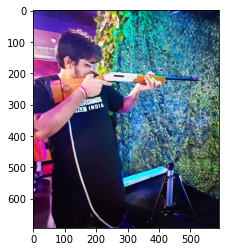

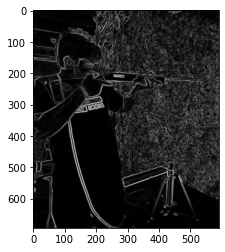

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


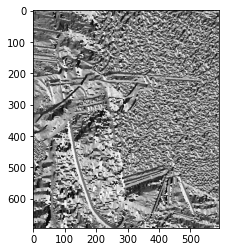

Lossy conversion from float64 to uint8. Range [-179.99999999999997, 180.0]. Convert image to uint8 prior to saving to suppress this warning.


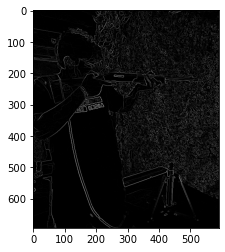

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


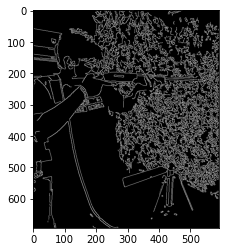

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


In [6]:
#Canny Edge Detector Implementation and test

input_path = "C:\\Users\\iamsc\\data\\"
output_path = "C:\\Users\\iamsc\\canny_output\\"
img_name = ["op.jpg"]

#Load the input images
for img in img_name :
    input_img = imageio.imread(input_path + img)
    plt.imshow(input_img)
    plt.show()
    
    #Convert the image to grayscale
    gray_input_img = rgb2gray(input_img)
    
    #Apply gaussian blurring
    blur_img = ndimage.gaussian_filter(gray_input_img, sigma = 1.0)
    
    #Find gradient Fx
    x_grad = gradient_x(blur_img)
    
    #Find gradient Fy
    y_grad = gradient_y(blur_img)

    #Compute edge strength
    grad_mag = gradient_mag(x_grad, y_grad)
    plt.imshow(grad_mag, cmap = plt.get_cmap('gray'))
    plt.show()
    imageio.imwrite(output_path + img.split('.')[0] + "/img1_grad_mag.jpg", grad_mag, cmap = 'gray')
    
    #Compute direction of gradient
    grad_dir = np.degrees(np.arctan2(y_grad, x_grad))
    plt.imshow(grad_dir, cmap = plt.get_cmap('gray'))
    plt.show()
    imageio.imwrite(output_path + img.split('.')[0] + "/img2_grad_dir.jpg", grad_dir, cmap = 'gray')
    
    
    #Phase 2 : Non maximal suppression
    closest_dir = closest_dir_function(grad_dir)
    thinned_output = non_maximal_suppressor(grad_mag, closest_dir)
    plt.imshow(thinned_output, cmap = plt.get_cmap('gray'))
    plt.show()
    imageio.imwrite(output_path + img.split('.')[0] + "/img3_thinned.jpg", thinned_output, cmap = 'gray')
    
   

    #Phase 3 : Hysteresis Thresholding
    output_img = hysteresis_thresholding(thinned_output)
    plt.imshow(output_img, cmap = plt.get_cmap('gray'))
    plt.show()
    imageio.imwrite(output_path + img.split('.')[0] + "/img4_final_output.jpg", output_img, cmap = 'gray')


# imgg=cv2.imread("/content/data/img.png")
# kernel=np.ones((5,5),np.uint8)
# imgGray = cv2.cvtColor (imgg, cv2.COLOR_BGR2GRAY)
# imgBlur=cv2.GaussianBlur(imgGray,(7,7),0)
# imgCanny=cv2.Canny(img,100,100) #threshold of edges
# cv2.imshow("canny function",imgCanny)

Using MSE -> mean squared error
Canny			 Sobel			 Efficient
53394.5918973287 	 457837.3220151265		Canny

10009.572457207574 	 423453.7714606391		Canny

52033.67187105336 	 280993.8775463607		Canny

57745.79156096009 	 186092.55259242698		Canny

20228.322749869858 	 367350.6882856151		Canny

2504.613265 	 274153.693299375		Canny

4661.082640625 	 256153.514279375		Canny

35911.793475678736 	 402105.34627375565		Canny

17733.609292310997 	 758374.3732565506		Canny

9689.377392352186 	 417331.47494805057		Canny

18077.982976649528 	 301681.8715863325		Canny

16301.575648564696 	 459128.14912382176		Canny

28567.58846706814 	 301337.6063096788		Canny



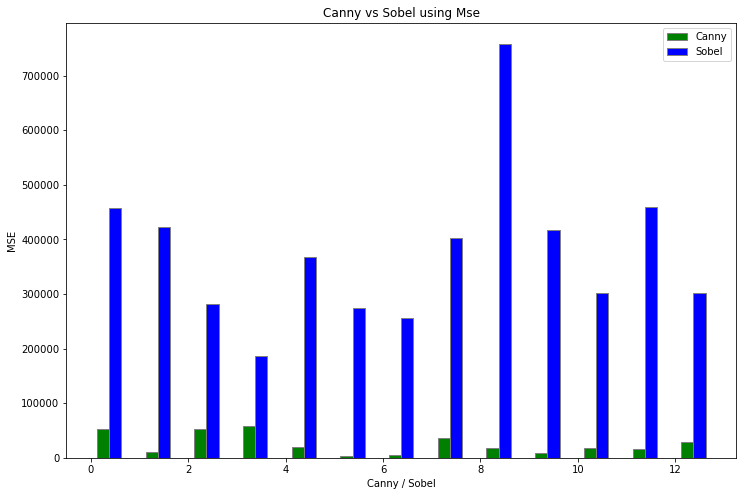

In [60]:
#Canny Edge Detector Implementation and test
import numpy as np
import cv2
input_path = "C:\\Users\\iamsc\\data\\"
output_path = "C:\\Users\\iamsc\\canny_output\\"
img_name = ["mine2.jpg","mine3.jpg","mine4.jpg","mine5.jpg","mine6.jpg","mine7.jpg","mine8.jpg","mine9.jpg","mine10.jpg","mine11.jpg","mine12.jpg","mine13.jpg","mine14.jpg"]



#mse function
def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])

    # return the MSE, the lower the error, the more "similar"
    # the two images are
    return err
print("Using MSE -> mean squared error")
print("Canny\t\t\t","Sobel\t\t\t","Efficient")
l1=[]
l2=[]
l3=[]
#Load the input images
count=0
for img in img_name :
    count=count+1
    l1.append(count)
    img1 = imageio.imread(input_path + img)
    
#     img1 = cv2.imread ("Resources/op.jpg")
    img1=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
    t_lower = 50  # Lower Threshold
    t_upper = 150  # Upper threshold
    img2 = cv2.Canny(img1, t_lower, t_upper)
    img3=cv2.Sobel(img1,cv2.CV_64F,1,0,ksize=5)
    a=mse(img1,img2)#canny
    l2.append(a)
    b=mse(img1,img3)#sobel
    l3.append(b)
    
    print(mse(img1,img2),"\t",mse(img1,img3),end="\t\t")
    if(a>b):
        print("Sobel")
    else:
        print("Canny")
#     print(mse(img1,img3))
    print()

barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
# plt.bar(l1, l2, color ='maroon',
#         width = 0.4)
br1 = np.arange(len(l1))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
plt.bar(br2, l2, color ='g', width = barWidth,
        edgecolor ='grey', label ='Canny')
plt.bar(br3, l3, color ='b', width = barWidth,
        edgecolor ='grey', label ='Sobel')
 
plt.xlabel("Canny / Sobel")
plt.ylabel("MSE")
plt.title("Canny vs Sobel using Mse")
plt.legend()
plt.show()
    
    
    


# imgg=cv2.imread("/content/data/img.png")
# kernel=np.ones((5,5),np.uint8)
# imgGray = cv2.cvtColor (imgg, cv2.COLOR_BGR2GRAY)
# imgBlur=cv2.GaussianBlur(imgGray,(7,7),0)
# imgCanny=cv2.Canny(img,100,100) #threshold of edges
# cv2.imshow("canny function",imgCanny)

In [70]:
#Using histograms
import numpy as np
import cv2
input_path = "C:\\Users\\iamsc\\data\\"
output_path = "C:\\Users\\iamsc\\canny_output\\"
img_name = ["mine1.jpg","mine2.jpg","mine3.jpg","mine4.jpg","mine5.jpg","mine6.jpg","mine7.jpg","mine8.jpg","mine9.jpg","mine10.jpg","mine11.jpg","mine12.jpg","mine13.jpg","mine14.jpg"]



#mse function
def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])

    # return the MSE, the lower the error, the more "similar"
    # the two images are
    return err
print("Using Histogram (more the value, more efficient)")
print("Canny\t\t","Sobel")
l2=[]
l3=[]
l1=[]
#Load the input images
for img in img_name :
    img1 = imageio.imread(input_path + img)
    
#     img1 = cv2.imread ("Resources/op.jpg")
    img1=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
    t_lower = 50  # Lower Threshold
    t_upper = 150  # Upper threshold
    img2 = cv2.Canny(img1, t_lower, t_upper)
#     img3=cv2.Sobel(img1,cv2.CV_64F,1,0,ksize=5)
    kernel=np.ones((3,3),np.uint8)
    img3=cv2.Sobel(img1,-1,1,1)
#     a=mse(img1,img2)#canny
#     b=mse(img1,img3)#sobel
    
#     print(mse(img1,img2),"\t",mse(img1,img3))
#     if(a>b):
#         print("\t\t\t\t\tsobel")
#     else:
#         print("Efficient------------------------->Canny")
# #     print(mse(img1,img3))
#     print()
    
    
    image = img1
    gray_image = image
    histogram = cv2.calcHist([gray_image], [0],
                             None, [256], [0, 256])

    # data1 image
    image = img2
    gray_image1 = image
    histogram1 = cv2.calcHist([gray_image1], [0],
                              None, [256], [0, 256])

    # data2 image
    image = img3
    gray_image2 = image
    histogram2 = cv2.calcHist([gray_image2], [0],
                              None, [256], [0, 256])

    c1, c2 = 0, 0

    # Euclidean Distance between data1 and test
    i = 0
    while i < len(histogram) and i < len(histogram1):
        c1 += (histogram[i] - histogram1[i]) ** 2
        i += 1
    c1 = c1 ** (1 / 2)

    # Euclidean Distance between data2 and test
    i = 0
    while i < len(histogram) and i < len(histogram2):
        c2 += (histogram[i] - histogram2[i]) ** 2
        i += 1
    c2 = c2 ** (1 / 2)
    l2.append(c1)
    l3.append(c2)
    print(c1,"\t",c2,end="\t")
    if c1 > c2:
        print("Canny")
    else:
        print("Sobel")
    
    


# imgg=cv2.imread("/content/data/img.png")
# kernel=np.ones((5,5),np.uint8)
# imgGray = cv2.cvtColor (imgg, cv2.COLOR_BGR2GRAY)
# imgBlur=cv2.GaussianBlur(imgGray,(7,7),0)
# imgCanny=cv2.Canny(img,100,100) #threshold of edges
# cv2.imshow("canny function",imgCanny)

Using Histogram (more the value, more efficient)
Canny		 Sobel
[659202.] 	 [540729.]	Canny
[834350.9] 	 [758502.9]	Canny
[550766.3] 	 [405483.62]	Canny
[808448.5] 	 [729539.44]	Canny
[862749.6] 	 [805593.3]	Canny
[2158993.] 	 [1564224.9]	Canny
[1594917.8] 	 [1362592.9]	Canny
[1600152.9] 	 [1366540.2]	Canny
[1787374.1] 	 [1546252.2]	Canny
[1583677.] 	 [1182785.9]	Canny
[1778931.6] 	 [1376307.6]	Canny
[1838300.8] 	 [1456472.1]	Canny
[1522851.8] 	 [1067114.]	Canny
[563004.7] 	 [331923.1]	Canny
